# ANOVA 

**Analisis de varianza**: divide la variacion total de las mediciones de respuesta en partes que pueden ser atribuidas a varios factores de interes para el experimentador. 

El interes esta en comparar los tratamientos en cuanto a sus medias poblacionales, y con respecto a sus varianzas. 

La hipotesis fundamental a probar cuando se comparan varios tratamientos es: 

$$ H_0 : \mu_1 = \mu_2 = ... = \mu_k = \mu $$

<center> $ H_A : \mu_i \not= \mu_j$  para algun  $i \not= j $ </center>

La estrategia natural es obtener una muestra representativa de mediciones en cada uno de los tratamientos, u construir un estadistico de prueba para decidir el resultado de dicha comparacion. **Estadistico F**. 

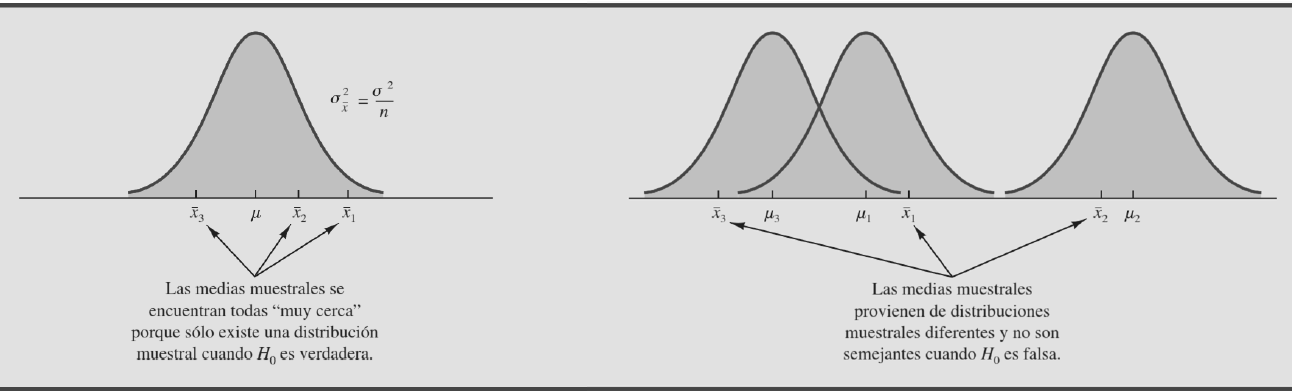

## Suposiciones del Modelo

La validez de los resultados obtenidos en cualquier ANOVA quea sujeta a que los supuestos del modelo se cumplan. 

Esto es, la respuesta Y se debe distribuir de manera normal, con la misma varianza en cada tratamiento y las mediciones deben ser independientes. Estos supuestos sobre Y se traducen en supuestos sobre el termino error (e) en el modelo. 

Es practica comun utilizar la muestra de residuos para comprobar los supuestos del modelo, ya que si los supuestos se cumplen, los residuos o residuales se pueden ver como una muestra aleatoria de una distribucion normal con media cero y varianza constante. Los residuos, $ e_{ij} $, se definen como la diferencia entre la respuesta observada y la respuesta predicha por el modelo, lo cual permite hacer un dignostico de la calidad del modelo, ya que sus magnitudes senalan que tan bien describe los datos el modelo. 

Los supuestos del modelo lineal, en terminos de residuos, son: 

1. Los $ e_{ij} $ siguen una distribucion normal con media cero. 
2. Los $ e_{ij} $ son independientes entre si. 
3. Los residuos de cada tratamiento tienen la misma varianza $ \sigma^2 $

Si no se rechaza la hipotesis nula: $ H_0 : \mu_1 = \mu_2 = ... = \mu_k = \mu $, se concluye que los tratamientos no son diferentes. 

## Comparacion de rangos multiples

Si se rechaza la $H_0$, y se acepta la hipotesis alternativa $ H_A : \mu_i \not= \mu_j $ para algun $ i \not= j $, es necesario investigar cuales tratamientos resultaron diferentes, o cuales provocan la diferencia. 

Los **metodos de comparacion multiple** o **pruebas de rangos multiples** responden estas interrogantes probando la igualdad de los posibles pares de medias. La diferencia entre los metodos radica en la potencia que tienen para detectar las diferencias entre las medias, una prueba es mas potente si es capaz de detectar diferencias mas pequenas. 

## Metodo LSD (diferencia minima significativa)

Una vez se rechazo $H_0$ en el ANOVA, el problema es probrar la igualdad de todos los posibles pares de medias con la hipotesis. 

$$ H_0: \mu_i = \mu_j $$

$$ H_1: \mu_i \not= \mu_j $$

para toda $ i \not= j $

Para $k$ tratamientos se tienen en total $k(k-1)/2$ pares de medias.  

El estadistico de prueba para cada una de las hipotesis dada es la correspondiente diferencia en valor absoluto entre sus medias muestrales $ |\bar{Y_i} - \bar{Y_j}| $. Se rechaza la hipotesis nula, si ocurre que: 

$$ |\bar{Y_i} - \bar{Y_j}| > t_{\alpha/2,N-k} \sqrt{CM_E (\frac{1}{n_i} + \frac{1}{n_j})} = LSD $$

Donde el valor de $t_{\alpha/2,N-k}$ se lee de la distribucion $T$ Student con $N-k$ grados de libertad que corresponden al error. 

El $CM_E$ es el cuadrado medio de error y se obtiene de la tabla ANOVA. 

$n_i$ y $n_j$ son el numero de observaciones para los tratamientos $i$ y $j$, respectivamente. 

La cantidad LSD se llama *diferencia minima significativa (least significant difference)*, es la diferencia minima que debe existir entre dos medias muestrales para considerar que los tratamientos correspondientes son significativamente differentes. Cada diferencia de medias muestrales en valor absoluto que sean mayores que el numero LSD se declaran significativas. 

Si el diseno es balanceado, el calculo de LSD se simplifica: 

$$LSD = t_{\alpha/2,N-k} \sqrt{(2 CM_E/n)} $$

En cazo de rechazar $H_0$ se acepta la hipotesis alternativa $H_1: \mu_i \not= \mu_j$, la cual nos dice que las medias de los tratamientos $i$ y $j$ son diferentes. 

El metodo LSD tiene una potencia importante, por lo que en ocaciones declara significativas aun pequenas diferencias. 

In [14]:
import pandas as pd
import statsmodels.api as sm

In [26]:
myDF = pd.read_csv('MetodoEnsamble.csv')
myDF

,MetodoEnsamble,Tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


Ordinary Least Squares Function

In [16]:
from statsmodels.formula.api import ols

In [22]:
model = ols('Tiempo ~ MetodoEnsamble', data=myDF).fit()

In [23]:
aovRes = sm.stats.anova_lm(model, typ=2)
aovRes

,sum_sq,df,F,PR(>F)
MetodoEnsamble,69.5,3.0,9.423729,0.001771
Residual,29.5,12.0,NaN,NaN
